In [1]:
#importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('forest_cover.csv')

In [3]:
df.head()

Unnamed: 0  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0           0     3351.0     NaN   27.0                             726.0   
1           1     2732.0   129.0    7.0                             212.0   
2           2     2572.0    24.0    9.0                             201.0   
3           3     2824.0    69.0   13.0                             417.0   
4           4     2529.0    84.0    5.0                             120.0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                           124.0                           3813.0   
1                             1.0                           1082.0   
2                           689.0                            957.0   
3                            39.0                           3223.0   
4                             9.0                           1092.0   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type36  \
0          192.0           252.0            NaN  ...          NaN   
1          231.0           236.0          137.0  ...          NaN   
2          216.0           222.0            NaN  ...          0.0   
3            NaN           214.0            NaN  ...          0.0   
4            NaN           231.0          139.0  ...          0.0   

   Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40    Forest_Cover  Neota  \
0          NaN          NaN          NaN          0.0      Spruce/Fir      0   
1          NaN          NaN          0.0          0.0  Lodgepole Pine      0   
2          NaN          0.0          0.0          0.0  Lodgepole Pine      0   
3          0.0          NaN          0.0          0.0  Lodgepole Pine      0   
4          0.0          NaN          0.0          0.0  Lodgepole Pine      0   

   Rawah  Comanche Peak  Cache la Poudre  
0      1              0                0  
1      0              1                0  
2      0              1                0  
3      1              0                0  
4      1              0                0  

[5 rows x 56 columns]

In [4]:
df.tail()

Unnamed: 0  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
30855       30855     -730.0     NaN   15.0                              30.0   
30856       30856     2975.0    57.0   15.0                             342.0   
30857       30857     2797.0   341.0   21.0                               NaN   
30858       30858     3245.0    89.0   20.0                             618.0   
30859       30859     2980.0     NaN    3.0                              30.0   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
30855                             7.0                          25383.0   
30856                          -613.0                           4573.0   
30857                            19.0                            824.0   
30858                             NaN                              NaN   
30859                             2.0                           5615.0   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type36  \
30855          239.0           212.0          100.0  ...          0.0   
30856          229.0           208.0          109.0  ...          NaN   
30857            NaN           205.0          168.0  ...          NaN   
30858          246.0           204.0           79.0  ...          NaN   
30859          215.0           242.0          165.0  ...          0.0   

       Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40    Forest_Cover  \
30855          NaN          NaN          0.0          0.0  Lodgepole Pine   
30856          0.0          0.0          0.0          0.0  Lodgepole Pine   
30857          0.0          0.0          0.0          NaN  Lodgepole Pine   
30858          0.0          NaN          0.0          NaN      Spruce/Fir   
30859          NaN          0.0          0.0          0.0      Spruce/Fir   

       Neota  Rawah  Comanche Peak  Cache la Poudre  
30855      0      0              1                0  
30856      0      1              0                0  
30857      0      0              1                0  
30858      0      1              0                0  
30859      0      1              0                0  

[5 rows x 56 columns]

In [5]:
#Checking the general information of the dataset (data types, memory usage, nulls)
print("\nGeneral information about the dataset:")
print(df.info())

#Summary statistics (mean, std, min, max, etc.)
print("\nSummary statistics:")
print(df.describe())

#Checking for missing values in rows
print("\nPercentage of null values in each row:")
null_percentage_rows = df.isnull().mean(axis=1) * 100
print(null_percentage_rows)

#Checking the number of unique values in each column (good for categorical data)
print("\nNumber of unique values in each column:")
print(df.nunique())

df = df.drop(columns=['Unnamed: 0'])


General information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30860 entries, 0 to 30859
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          30860 non-null  int64  
 1   Elevation                           25923 non-null  float64
 2   Aspect                              23763 non-null  float64
 3   Slope                               28083 non-null  float64
 4   Horizontal_Distance_To_Hydrology    28392 non-null  float64
 5   Vertical_Distance_To_Hydrology      29009 non-null  float64
 6   Horizontal_Distance_To_Roadways     28392 non-null  float64
 7   Hillshade_9am                       21602 non-null  float64
 8   Hillshade_Noon                      27157 non-null  float64
 9   Hillshade_3pm                       22220 non-null  float64
 10  Horizontal_Distance_To_Fire_Points  24997 non-null  float64
 11  S

In [6]:
df.isnull().sum()
null_percentage = df.isnull().mean() * 100

# Display the percentage of null values for each column
null_percentage

Elevation                             15.998056
Aspect                                22.997408
Slope                                  8.998704
Horizontal_Distance_To_Hydrology       7.997408
Vertical_Distance_To_Hydrology         5.998056
Horizontal_Distance_To_Roadways        7.997408
Hillshade_9am                         30.000000
Hillshade_Noon                        11.999352
Hillshade_3pm                         27.997408
Horizontal_Distance_To_Fire_Points    18.998704
Soil_Type1                            18.998704
Soil_Type2                             8.998704
Soil_Type3                            17.997408
Soil_Type4                            21.999352
Soil_Type5                            10.000000
Soil_Type6                            27.997408
Soil_Type7                             0.000000
Soil_Type8                             0.000000
Soil_Type9                             0.000000
Soil_Type10                            0.000000
Soil_Type11                            0

In [7]:
# Dataset is loaded into a variable df
null_percentage_rows = df.isnull().mean(axis=1) * 100

# Display the percentage of null values for each row
null_percentage_rows

0        27.272727
1        36.363636
2        20.000000
3        21.818182
4        16.363636
           ...    
30855    23.636364
30856    16.363636
30857    36.363636
30858    32.727273
30859    16.363636
Length: 30860, dtype: float64

In [8]:
# Calculate the percentage of null values for each row
null_percentage_rows = df.isnull().mean(axis=1) * 100

# Find the average percentage of null values across all rows
avg_null_percentage = null_percentage_rows.mean()

# Display the result
print(f"Average percentage of null values across all rows: {avg_null_percentage:.2f}%")

Average percentage of null values across all rows: 26.18%


In [9]:
unique_values = df['Forest_Cover'].unique()

# Display the unique values in the 'forest_cover' column
print("Unique values in 'Forest_Cover' column:")
print(unique_values)
value_counts = df['Forest_Cover'].value_counts()
print("Count of each unique value in 'Forest_Cover' column:")
print(value_counts)

Unique values in 'Forest_Cover' column:
['Spruce/Fir' 'Lodgepole Pine' 'Ponderosa Pine' 'Aspen' 'Douglas-fir'
 'Krummholz' 'Cottonwood/Willow']
Count of each unique value in 'Forest_Cover' column:
Forest_Cover
Lodgepole Pine       14945
Spruce/Fir           11391
Ponderosa Pine        1895
Krummholz             1060
Douglas-fir            939
Aspen                  489
Cottonwood/Willow      141
Name: count, dtype: int64


In [10]:
# Calculate the percentage of null values in each column
null_percentage_columns = df.isnull().mean() * 100

# Calculate the percentage of null values in each row
null_percentage_rows = df.isnull().mean(axis=1) * 100

# 1. Columns with more than 40% null values
columns_more_than_40 = null_percentage_columns[null_percentage_columns > 40]
num_columns_more_than_40 = len(columns_more_than_40)

# 2. Rows with more than 40% null values
rows_more_than_40 = null_percentage_rows[null_percentage_rows > 40]
num_rows_more_than_40 = len(rows_more_than_40)

# Display the results
print(f"Percentage of null values in columns with more than 40% null values:")
print(columns_more_than_40)
print(f"\nNumber of columns with more than 40% null values: {num_columns_more_than_40}")

print(f"\nPercentage of null values in rows with more than 40% null values:")
print(rows_more_than_40)
print(f"\nNumber of rows with more than 40% null values: {num_rows_more_than_40}")


Percentage of null values in columns with more than 40% null values:
Soil_Type12    50.998056
Soil_Type17    41.999352
Soil_Type19    53.998704
Soil_Type20    60.000000
Soil_Type21    41.999352
Soil_Type24    46.999352
Soil_Type26    51.999352
Soil_Type29    58.998704
Soil_Type30    52.997408
Soil_Type31    57.997408
Soil_Type32    42.997408
Soil_Type33    50.998056
Soil_Type35    46.999352
Soil_Type36    57.997408
Soil_Type37    56.999352
Soil_Type38    45.998056
Soil_Type40    42.997408
dtype: float64

Number of columns with more than 40% null values: 17

Percentage of null values in rows with more than 40% null values:
401      43.636364
481      43.636364
864      45.454545
1138     43.636364
1449     41.818182
           ...    
28762    41.818182
29665    41.818182
29699    45.454545
30422    41.818182
30754    41.818182
Length: 123, dtype: float64

Number of rows with more than 40% null values: 123


In [11]:
#looking for duplicates

df.duplicated().sum()

np.int64(0)

In [12]:
df.describe()

Elevation        Aspect         Slope  \
count  25923.000000  23763.000000  28083.000000   
mean    2954.202639    153.369019     14.141402   
std      866.082144    490.489831     22.473536   
min     -730.000000  -1961.000000    -81.000000   
25%     2796.000000     56.000000      8.000000   
50%     2996.000000    126.000000     13.000000   
75%     3173.000000    268.500000     19.000000   
max     6704.000000   2281.000000    108.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      28392.000000                    29009.000000   
mean                         264.551176                       46.756145   
std                          679.431566                      156.142288   
min                        -2652.000000                     -613.000000   
25%                           95.000000                        6.000000   
50%                          218.000000                       30.000000   
75%                          391.000000                       72.000000   
max                         3144.000000                      689.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     28392.000000   21602.000000    27157.000000   
mean                       2363.317519     212.625127      223.363700   
std                        5379.999154      81.804297       59.364348   
min                      -20985.000000    -132.000000      -27.000000   
25%                        1057.000000     197.000000      212.000000   
50%                        1992.000000     218.000000      226.000000   
75%                        3393.250000     232.000000      238.000000   
max                       25383.000000     561.000000      477.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ...   Soil_Type35  \
count   22220.000000                        24997.000000  ...  16356.000000   
mean      143.421782                         1984.472737  ...      0.002874   
std       124.874519                         3830.336845  ...      0.053530   
min      -381.000000                       -14188.000000  ...      0.000000   
25%       117.000000                         1003.000000  ...      0.000000   
50%       143.000000                         1717.000000  ...      0.000000   
75%       171.000000                         2617.000000  ...      0.000000   
max       669.000000                        17774.000000  ...      1.000000   

        Soil_Type36   Soil_Type37   Soil_Type38   Soil_Type39   Soil_Type40  \
count  12962.000000  13270.000000  16665.000000  23145.000000  17591.000000   
mean       0.000077      0.000528      0.025503      0.023850      0.016258   
std        0.008783      0.022962      0.157650      0.152584      0.126471   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

              Neota         Rawah  Comanche Peak  Cache la Poudre  
count  30860.000000  30860.000000   30860.000000     30860.000000  
mean       0.051361      0.446371       0.440181         0.062087  
std        0.220737      0.497124       0.496417         0.241317  
min        0.000000      0.000000       0.000000         0.000000  
25%        0.000000      0.000000       0.000000         0.000000  
50%        0.000000      0.000000       0.000000         0.000000  
75%        0.000000      1.000000       1.000000         0.000000  
max        1.000000      1.000000       1.000000         1.000000  

[8 rows x 54 columns]

In [13]:
df.describe(include="object")

Forest_Cover
count            30860
unique               7
top     Lodgepole Pine
freq             14945

In [14]:
#To make all values positive

numeric_columns = df.select_dtypes(include=['number']).columns
def make_positive(x):
    return x if x >= 0 else x * -1

df[numeric_columns] = df[numeric_columns].apply(lambda x: x.apply(make_positive))
print(df)

       Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0         3351.0     NaN   27.0                             726.0   
1         2732.0   129.0    7.0                             212.0   
2         2572.0    24.0    9.0                             201.0   
3         2824.0    69.0   13.0                             417.0   
4         2529.0    84.0    5.0                             120.0   
...          ...     ...    ...                               ...   
30855      730.0     NaN   15.0                              30.0   
30856     2975.0    57.0   15.0                             342.0   
30857     2797.0   341.0   21.0                               NaN   
30858     3245.0    89.0   20.0                             618.0   
30859     2980.0     NaN    3.0                              30.0   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               124.0                           3813.0   
1                      

In [15]:
# List of columns having numerical features
mean_fill_columns = ["Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Horizontal_Distance_To_Fire_Points"]

#Fill the null values of these columns with mean (rounded to integers) as they have nuremical features
df[mean_fill_columns] = df[mean_fill_columns].fillna(df[mean_fill_columns].mean().round().astype(int))

#Handle the Slope Columns to make all values between 0 to 90
df['Slope'] = np.clip(df['Slope'], 0, 90)
df['Slope'] = df['Slope'].fillna(df['Slope'].mean().astype(int))

#Handle the Slope Columns to make all values between 0 to 360
df['Aspect'] = np.clip(df['Aspect'], 0, 360)
df['Aspect'] = df['Aspect'].fillna(df['Aspect'].mean().astype(int))

#Handle the Slope Columns to make all values between 0 to 4000
df['Elevation'] = np.clip(df['Elevation'], 0, 4000)
df['Elevation'] = df['Elevation'].fillna(df['Elevation'].mean().astype(int))

#Handle the Hillshade Columns to make all the values between 0 to 255
hillshade_columns = ["Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm"]
df[hillshade_columns] = df[hillshade_columns].clip(0, 255)
df[hillshade_columns] = df[hillshade_columns].fillna(df[hillshade_columns].mean().astype(int))

#List of categorical columns i.e. all the 40 Soil Types 
mode_fill_columns = df.loc[:, 'Soil_Type1':'Soil_Type40'].columns

# Fill Soil Type columns with null values with mode as they are one-hot encoded
df[mode_fill_columns] = df[mode_fill_columns].fillna(df[mode_fill_columns].mode().iloc[0])

missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only show columns with missing values
print(missing_values)

# Check the DataFrame after filling missing values
print(df)


Series([], dtype: int64)
       Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0         3351.0   166.0   27.0                             726.0   
1         2732.0   129.0    7.0                             212.0   
2         2572.0    24.0    9.0                             201.0   
3         2824.0    69.0   13.0                             417.0   
4         2529.0    84.0    5.0                             120.0   
...          ...     ...    ...                               ...   
30855      730.0   166.0   15.0                              30.0   
30856     2975.0    57.0   15.0                             342.0   
30857     2797.0   341.0   21.0                             401.0   
30858     3245.0    89.0   20.0                             618.0   
30859     2980.0   166.0    3.0                              30.0   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               124.0                           3813.0  

In [16]:
#Code for Scikit-learn OneHotEncoder
# Initialize OneHotEncoder with correct parameter
encoder = OneHotEncoder(sparse_output=False)  

# Reshape the column and fit-transform
encoded_values = encoder.fit_transform(df[['Forest_Cover']])

# Convert to DataFrame with correct column names
encoded_df = pd.DataFrame(encoded_values, columns=encoder.get_feature_names_out(['Forest_Cover']))

# Merge the new one-hot encoded columns
df = pd.concat([df, encoded_df], axis=1)

# Display the first few rows
print(df.head())

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0     3351.0   166.0   27.0                             726.0   
1     2732.0   129.0    7.0                             212.0   
2     2572.0    24.0    9.0                             201.0   
3     2824.0    69.0   13.0                             417.0   
4     2529.0    84.0    5.0                             120.0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                           124.0                           3813.0   
1                             1.0                           1082.0   
2                           689.0                            957.0   
3                            39.0                           3223.0   
4                             9.0                           1092.0   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0          192.0           252.0          148.0   
1          231.0           236.0          137.0   
2          216.0           222.0   

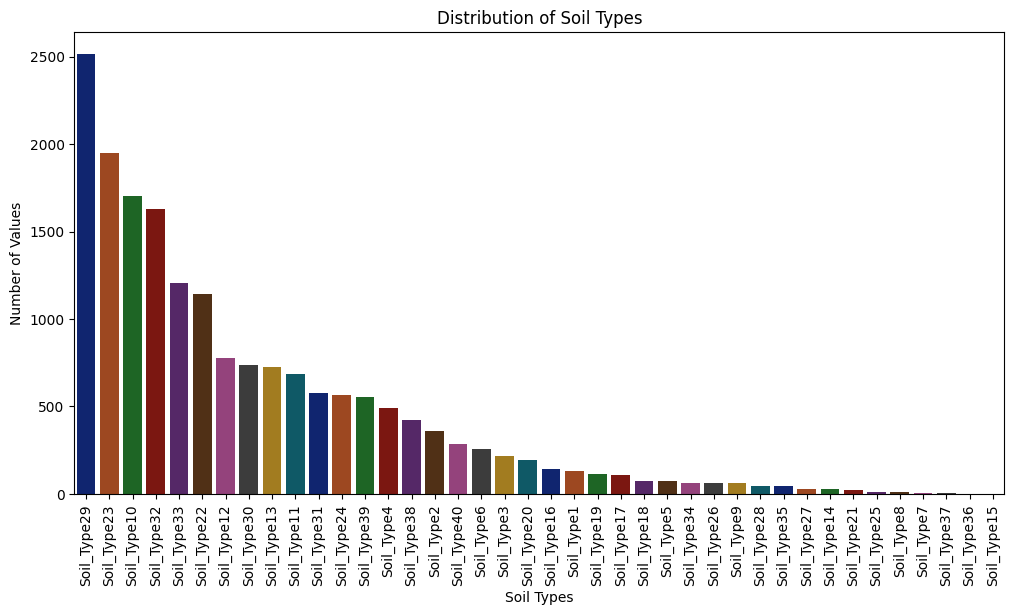

In [17]:
#Frequency of Soil Types

import matplotlib.pyplot as plt
import seaborn as sns

# Select only soil type columns
soil_type_columns = df.loc[:, 'Soil_Type1':'Soil_Type40'].columns

# Compute the sum of each soil type across all rows
soil_distribution = df[soil_type_columns].sum().sort_values(ascending=False)

# Bar graph for the soil distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=soil_distribution.index, y=soil_distribution.values, hue=soil_distribution.index, palette="dark", legend=False)
plt.xticks(rotation=90)
plt.xlabel("Soil Types")
plt.ylabel("Number of Values")
plt.title("Distribution of Soil Types")
plt.show()

In [18]:
#Dropping these coulumns as there is no signicant data present that can be useful

df = df.drop(columns=['Soil_Type7'])
df = df.drop(columns=['Soil_Type8'])
df = df.drop(columns=['Soil_Type36'])
df = df.drop(columns=['Soil_Type37'])
df = df.drop(columns=['Soil_Type15'])
df = df.drop(columns=['Soil_Type25'])

In [28]:
# Describing the dataset after all the cleaning beofre visualising it
df.describe()

Elevation        Aspect         Slope  \
count  30860.000000  30860.000000  30860.000000   
mean    2928.643390    166.027155     17.658587   
std      435.075147    103.537585     16.511069   
min      730.000000      0.000000      0.000000   
25%     2849.000000     80.000000      9.000000   
50%     2937.000000    166.000000     14.000000   
75%     3137.000000    236.000000     19.000000   
max     4000.000000    360.000000     90.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      30860.000000                    30860.000000   
mean                         401.102690                       79.915651   
std                          584.013553                      137.732580   
min                            0.000000                        0.000000   
25%                          124.000000                       12.000000   
50%                          268.000000                       38.000000   
75%                          401.000000                       80.000000   
max                         3144.000000                      689.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     30860.000000   30860.000000    30860.000000   
mean                       3371.434835     211.281918      219.228030   
std                        4616.292814      24.922110       34.385717   
min                           0.000000      52.000000        0.000000   
25%                        1207.000000     207.000000      214.000000   
50%                        2313.000000     211.000000      223.000000   
75%                        3409.000000     226.000000      236.000000   
max                       25383.000000     255.000000      255.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ...         Rawah  \
count   30860.000000                        30860.000000  ...  30860.000000   
mean      148.185353                         2703.031821  ...      0.446371   
std        38.239485                         3025.814352  ...      0.497124   
min         0.000000                            0.000000  ...      0.000000   
25%       131.000000                         1243.000000  ...      0.000000   
50%       148.000000                         2197.000000  ...      0.000000   
75%       161.000000                         2703.000000  ...      1.000000   
max       255.000000                        17774.000000  ...      1.000000   

       Comanche Peak  Cache la Poudre  Forest_Cover_Aspen  \
count   30860.000000     30860.000000        30860.000000   
mean        0.440181         0.062087            0.015846   
std         0.496417         0.241317            0.124881   
min         0.000000         0.000000            0.000000   
25%         0.000000         0.000000            0.000000   
50%         0.000000         0.000000            0.000000   
75%         1.000000         0.000000            0.000000   
max         1.000000         1.000000            1.000000   

       Forest_Cover_Cottonwood/Willow  Forest_Cover_Douglas-fir  \
count                    30860.000000              30860.000000   
mean                         0.004569                  0.030428   
std                          0.067441                  0.171764   
min                          0.000000                  0.000000   
25%                          0.000000                  0.000000   
50%                          0.000000                  0.000000   
75%                          0.000000                  0.000000   
max                          1.000000                  1.000000   

       Forest_Cover_Krummholz  Forest_Cover_Lodgepole Pine  \
count            30860.000000                 30860.000000   
mean                 0.034349                     0.484284   
std                  0.182126                     0.499761   
min                  0.000000                     0.000000   
25%                  0.000000           

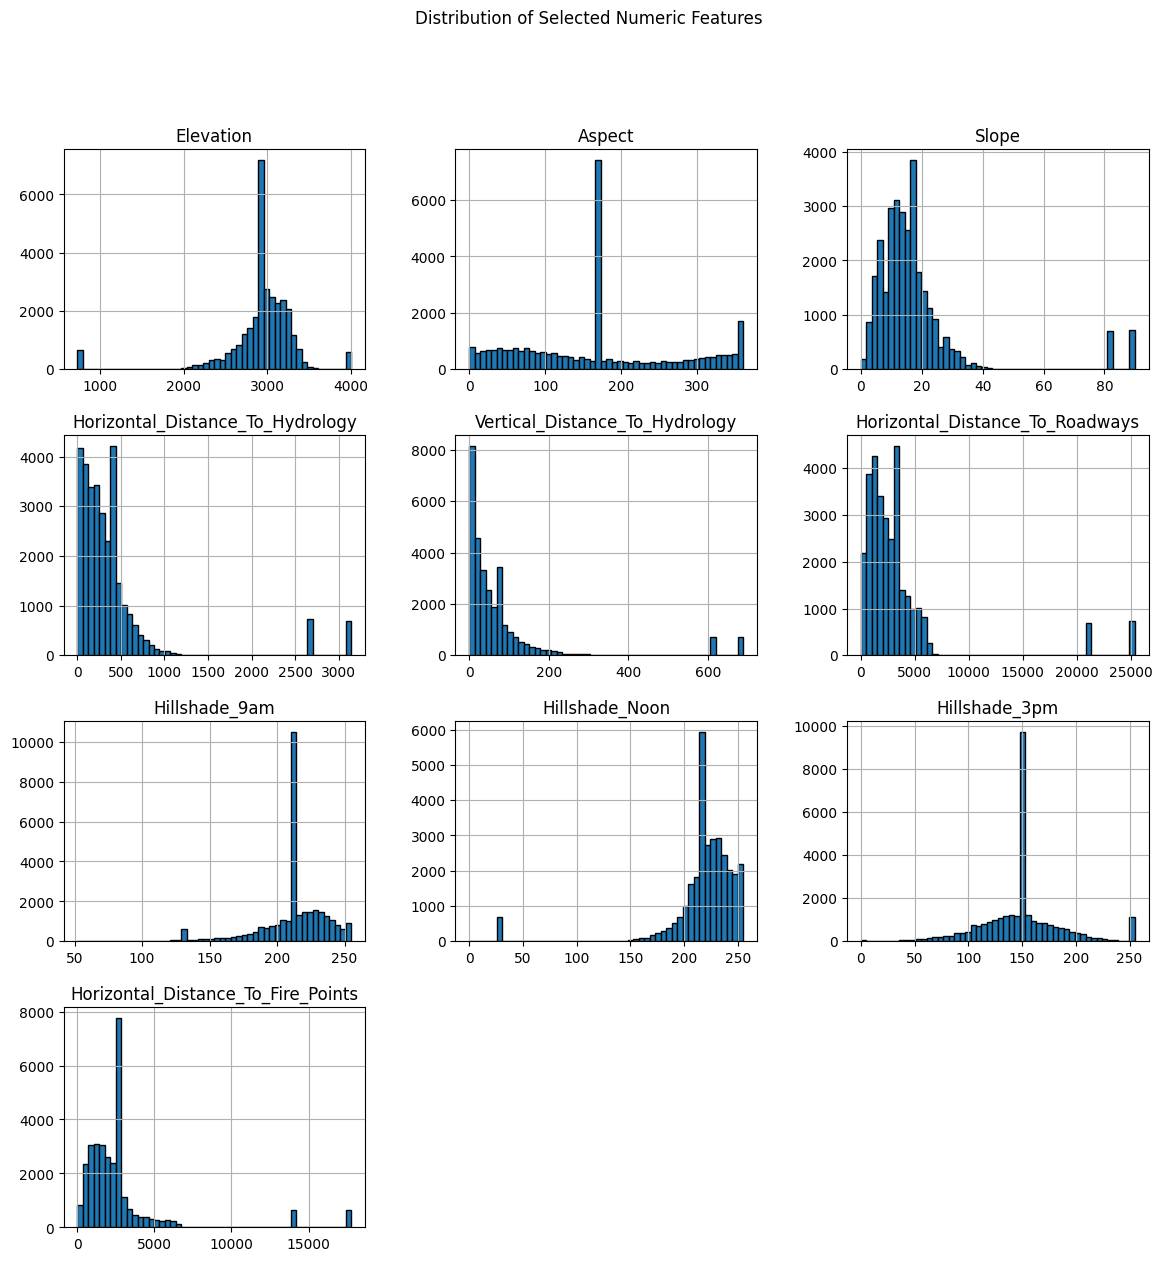

In [19]:
# Plotting the distrubution of selected numeric features
import matplotlib.pyplot as plt

# List the columns you want to plot
columns_to_plot = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']  # Add your desired columns here

# Plot histograms for the selected columns
df[columns_to_plot].hist(figsize=(14, 14), bins=50, edgecolor='black')
plt.suptitle("Distribution of Selected Numeric Features", fontsize=12)
plt.show()

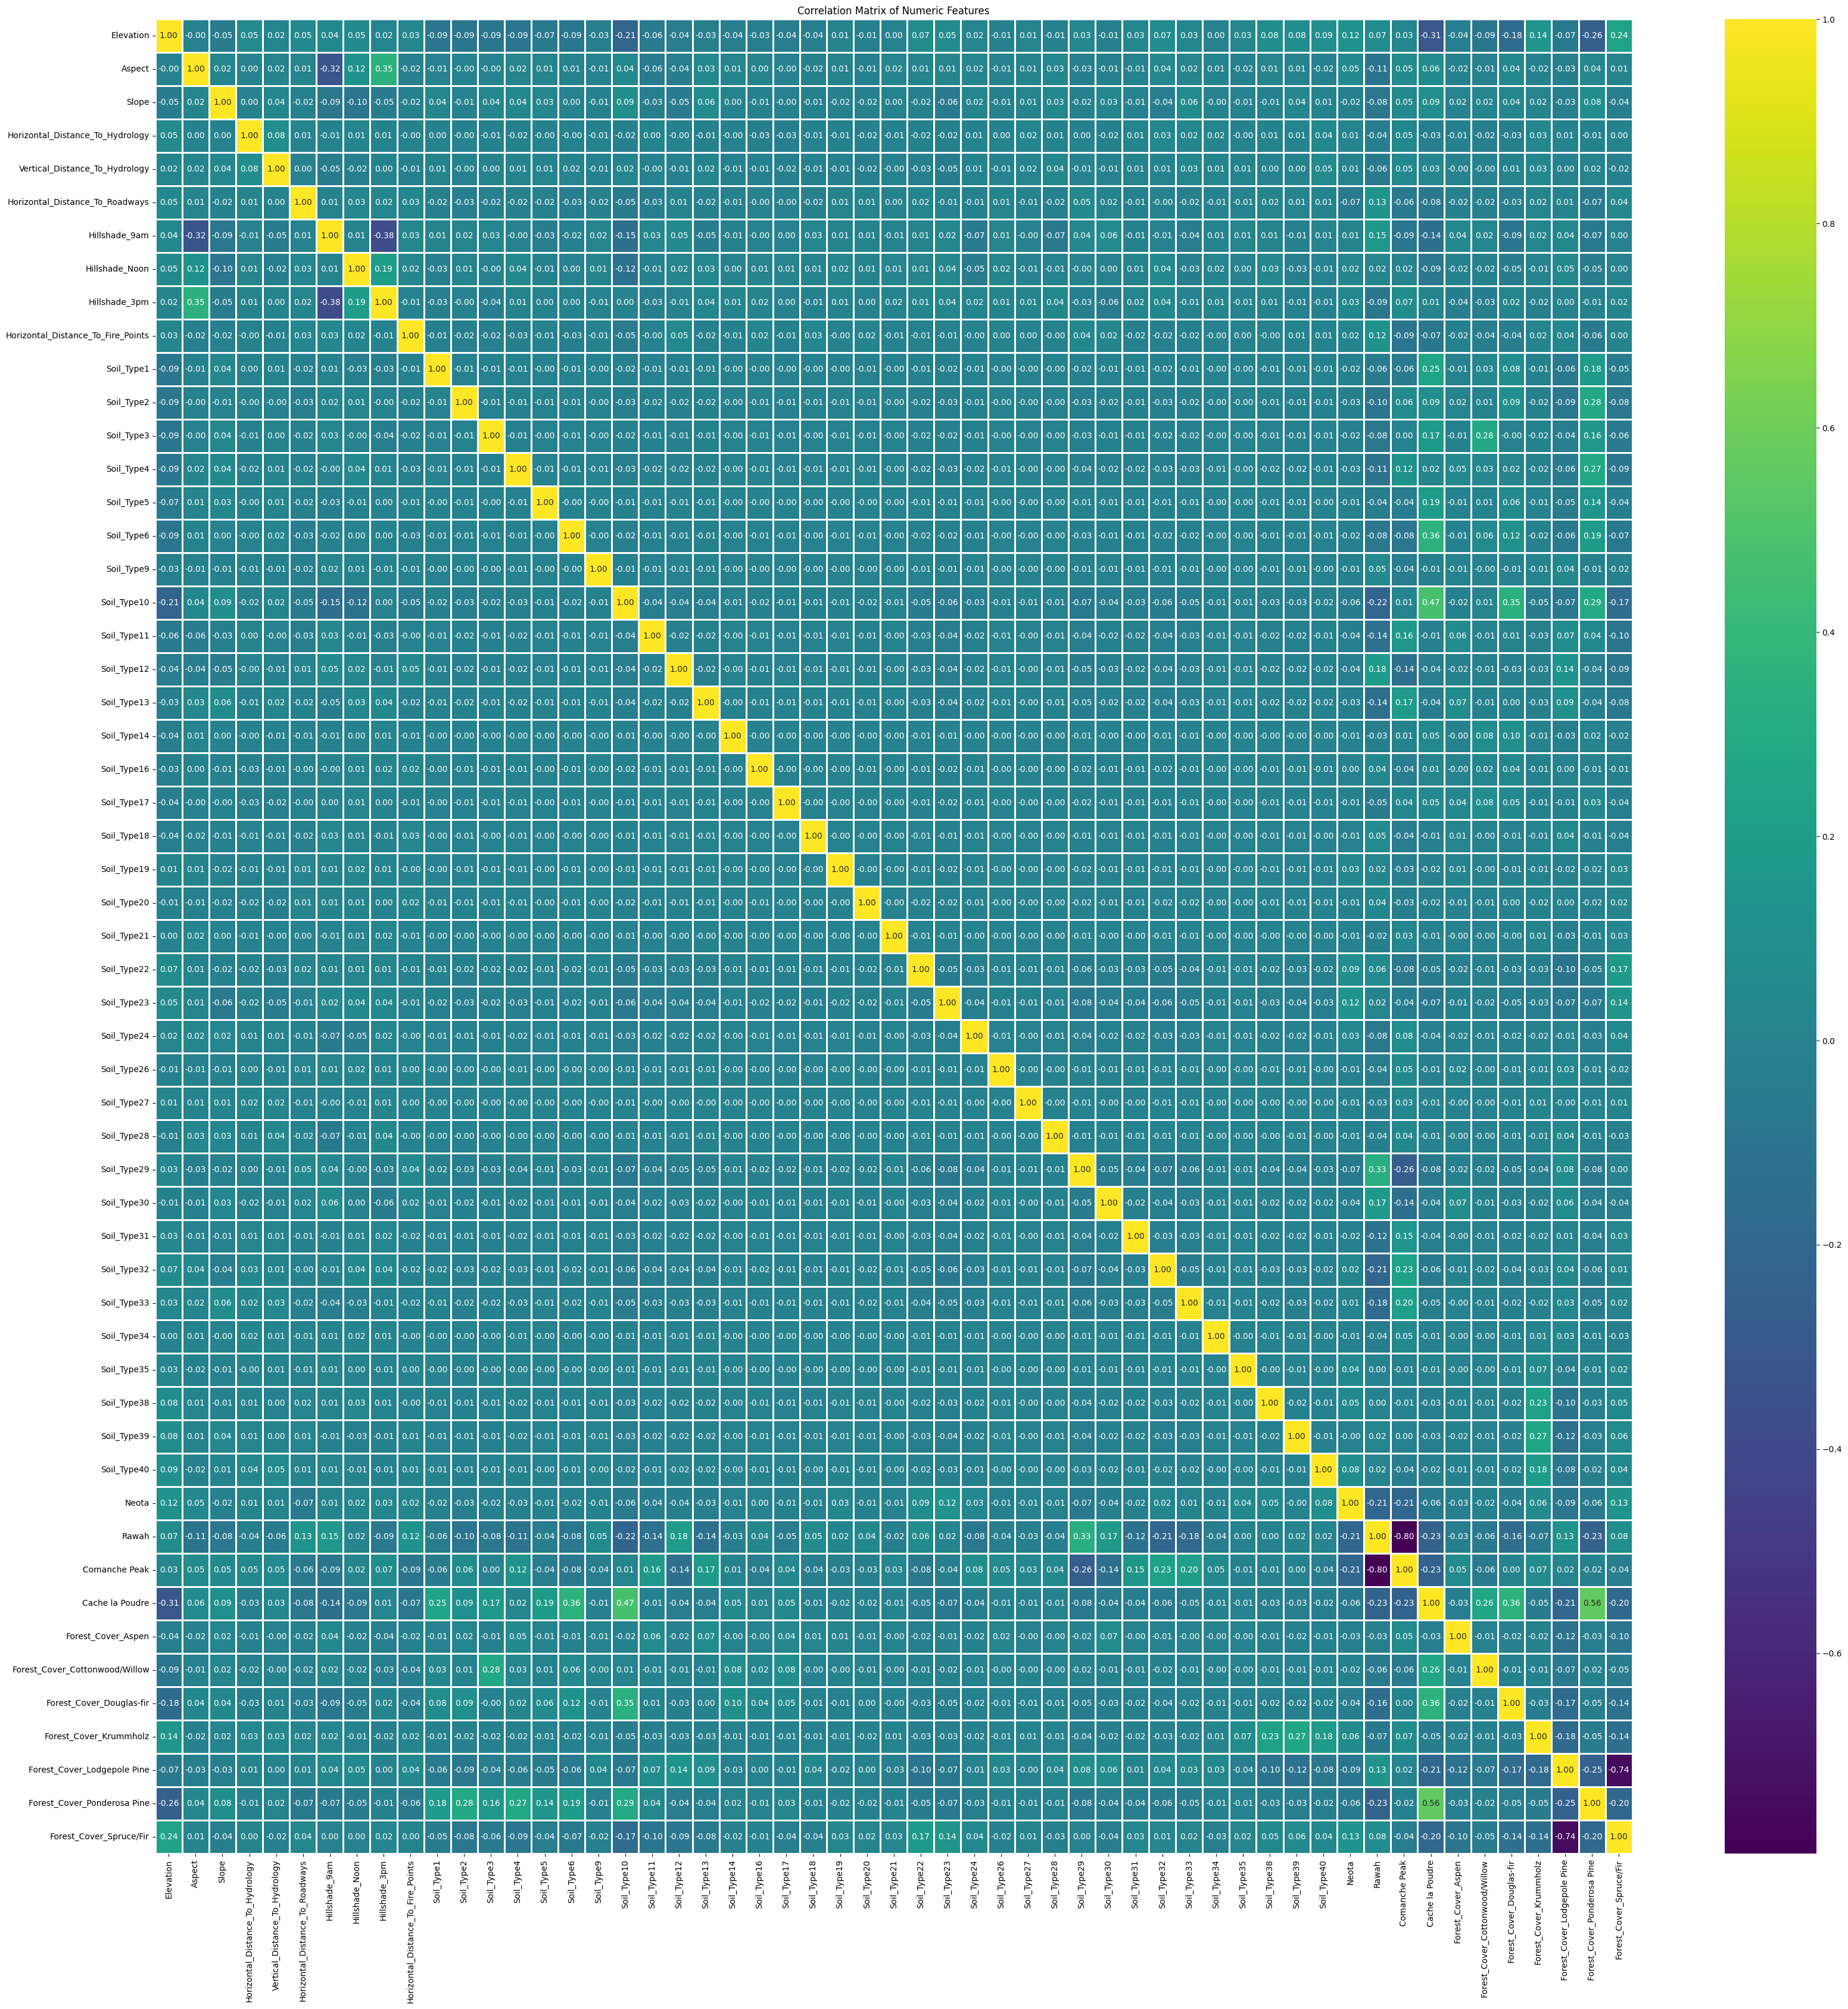

In [20]:
# Making a heatmap to visualize the correlation between numerical features.

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 40))

# Compute the correlation matrix for numeric columns only
corr_matrix = df.select_dtypes(include=['number']).corr()

# Plot the heatmap
sns.heatmap(corr_matrix, cmap="viridis", annot=True, fmt=".2f", linewidths=2)

plt.title("Correlation Matrix of Numeric Features")
plt.show()

<Figure size 1200x800 with 0 Axes>

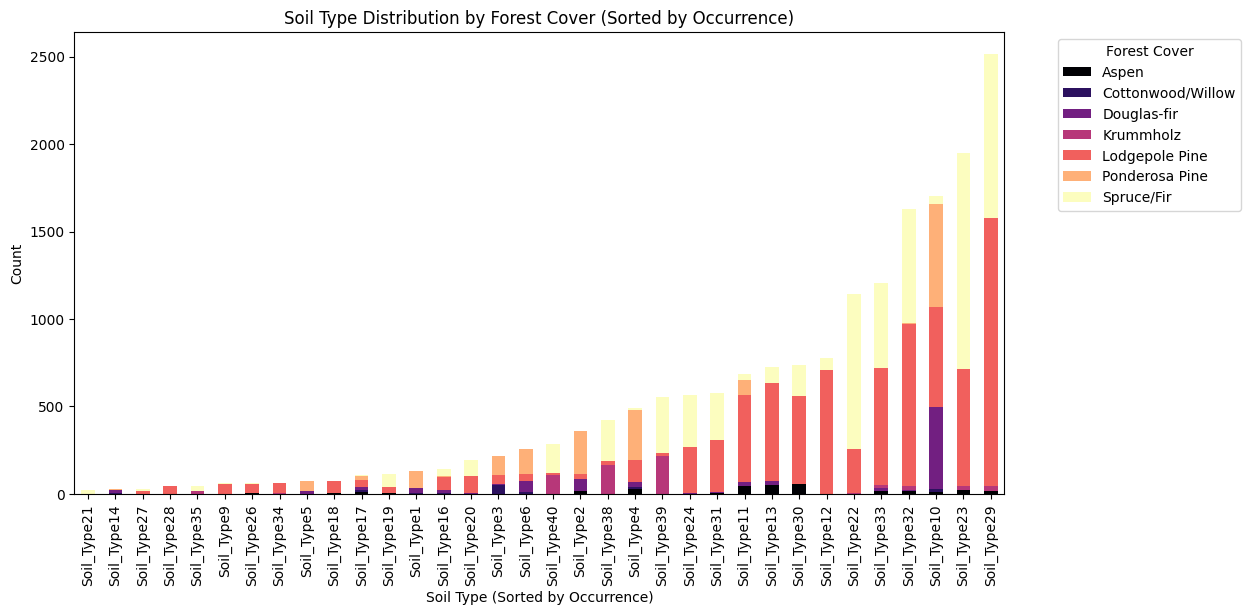

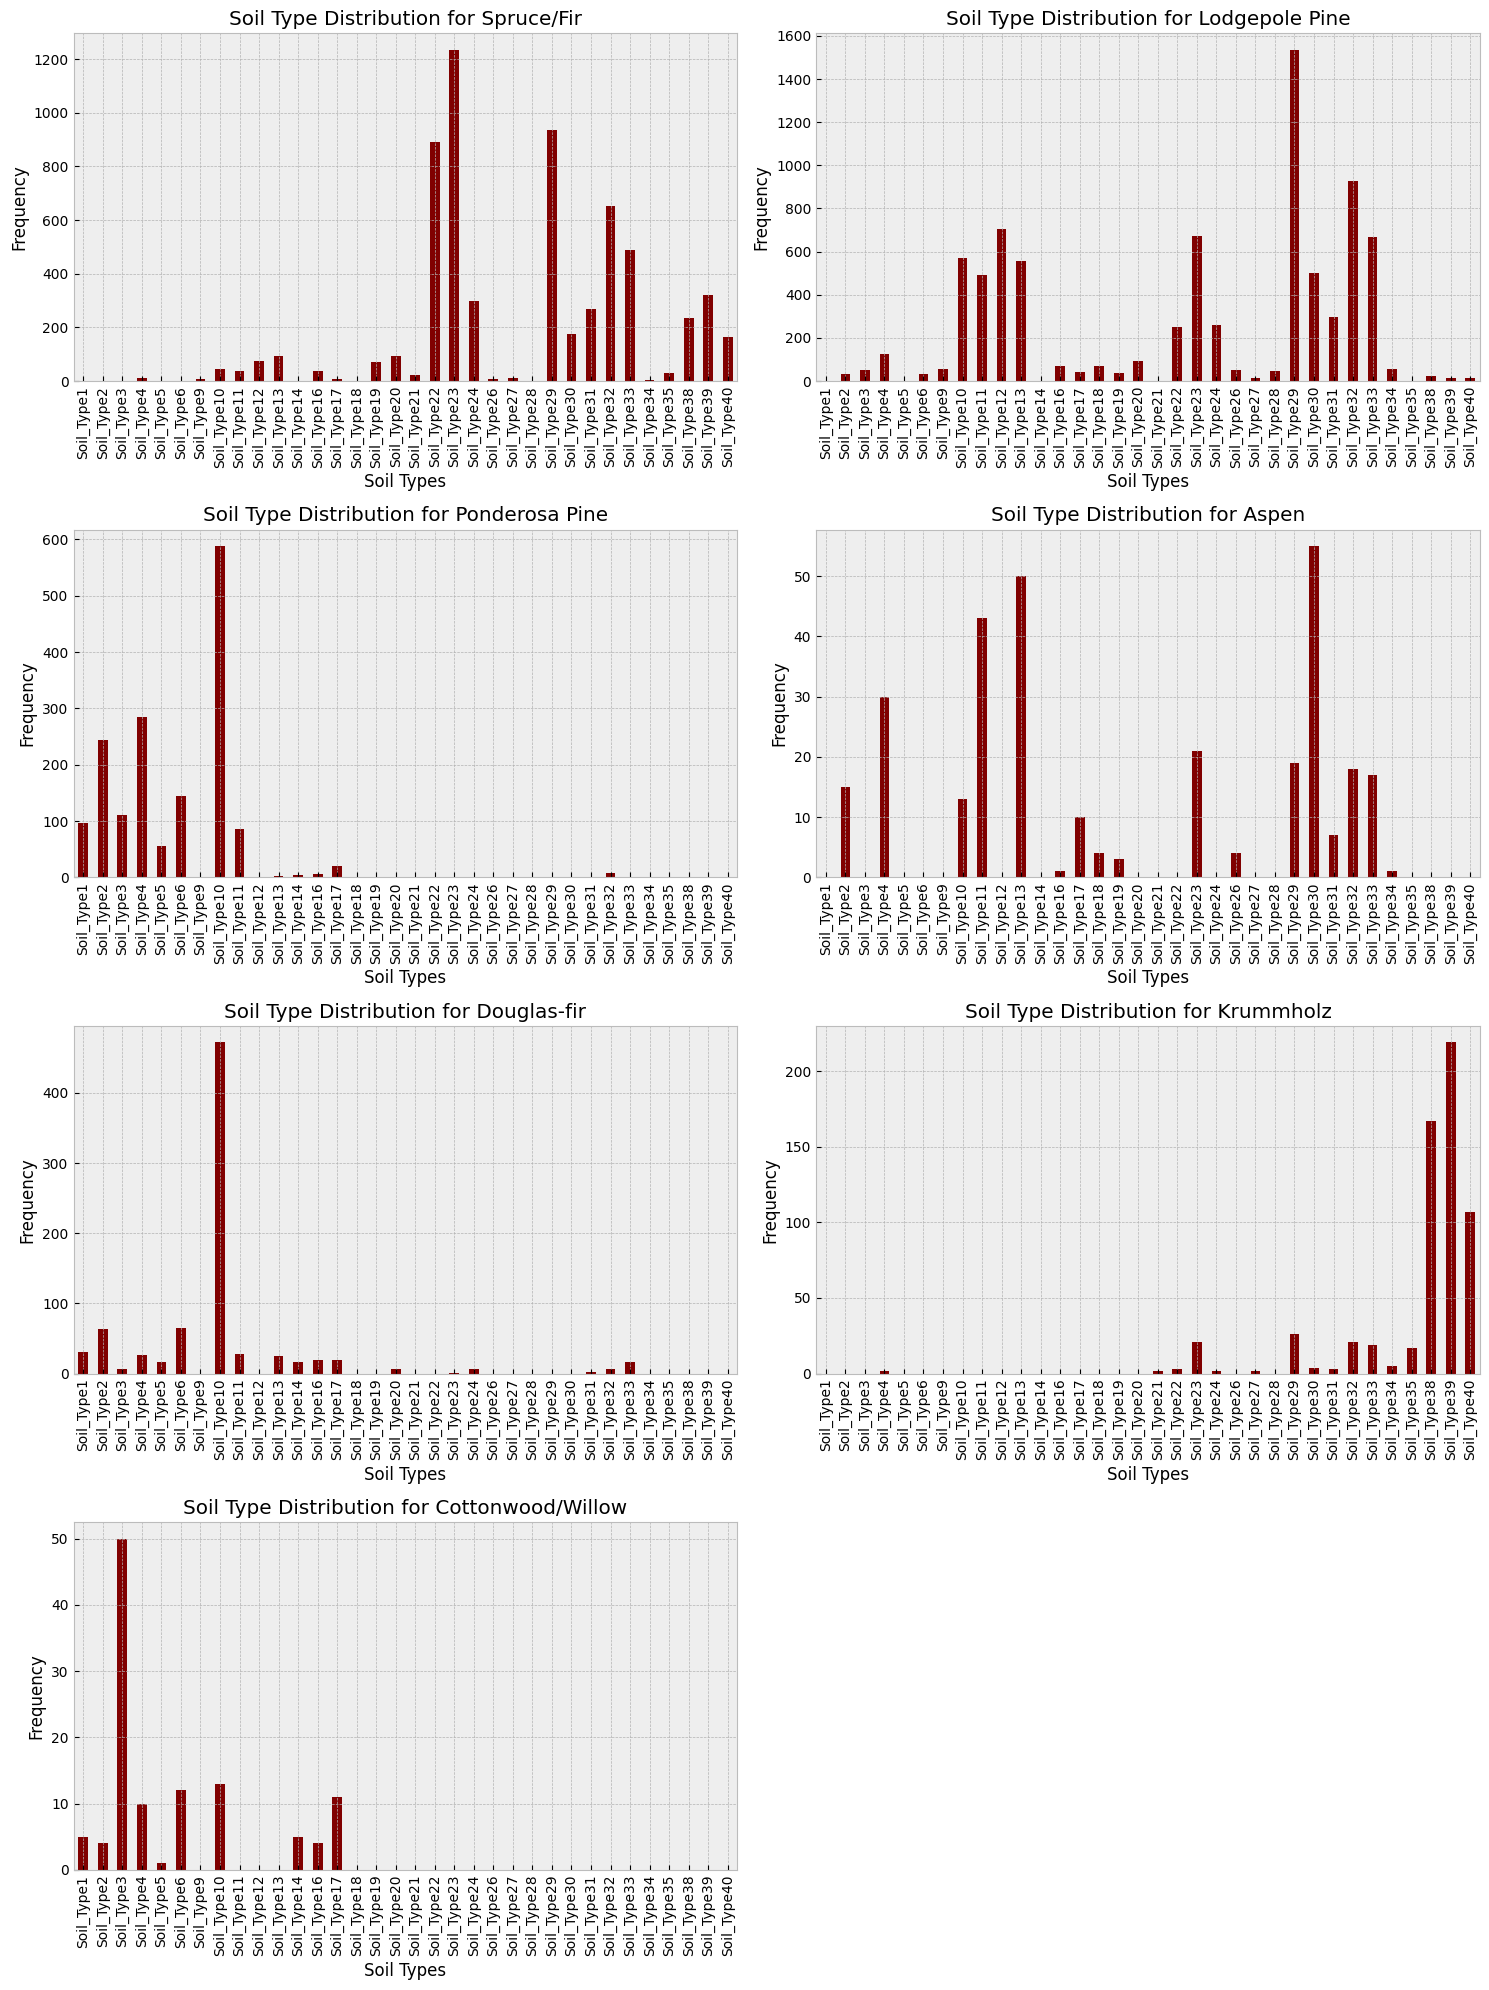

In [21]:
# Visualizing the distribution of soil types across different forest cover types using bar charts.

import matplotlib.pyplot as plt
import seaborn as sns

# Select soil type columns
soil_type_columns = df.loc[:, 'Soil_Type1':'Soil_Type40'].columns

# Count the number of times each soil type appears (nonzero occurrences)
soil_type_order = df[soil_type_columns].astype(bool).sum().sort_values().index

# Reorder the columns based on frequency (least to most occurrences)
forest_soil_dist = df.groupby("Forest_Cover")[soil_type_order].sum().T

# Plot the sorted stacked bar chart
plt.figure(figsize=(12, 8))
forest_soil_dist.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="magma")
plt.xlabel("Soil Type (Sorted by Occurrence)")
plt.ylabel("Count")
plt.title("Soil Type Distribution by Forest Cover (Sorted by Occurrence)")
plt.legend(title="Forest Cover", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

plt.style.use('bmh')

soil_type_columns = df.loc[:, 'Soil_Type1':'Soil_Type40'].columns

# Unique forest covers
forest_types = df['Forest_Cover'].unique()

# Plot graphs with an appropriate number of axes
fig, axes = plt.subplots(nrows=(len(forest_types) + 1) // 2, ncols=2, figsize=(15, 20))  # Adjust number of rows
axes = axes.flatten()

for i, forest in enumerate(forest_types):
    ax = axes[i]
    subset = df[df['Forest_Cover'] == forest]
    soil_sums = subset[soil_type_columns].sum()
    
    soil_sums.plot(kind='bar', ax=ax, color = 'maroon')
    ax.set_title(f"Soil Type Distribution for {forest}")
    ax.set_ylabel("Frequency")
    ax.set_xlabel("Soil Types")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Hide any unused subplot axes
for j in range(len(forest_types), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


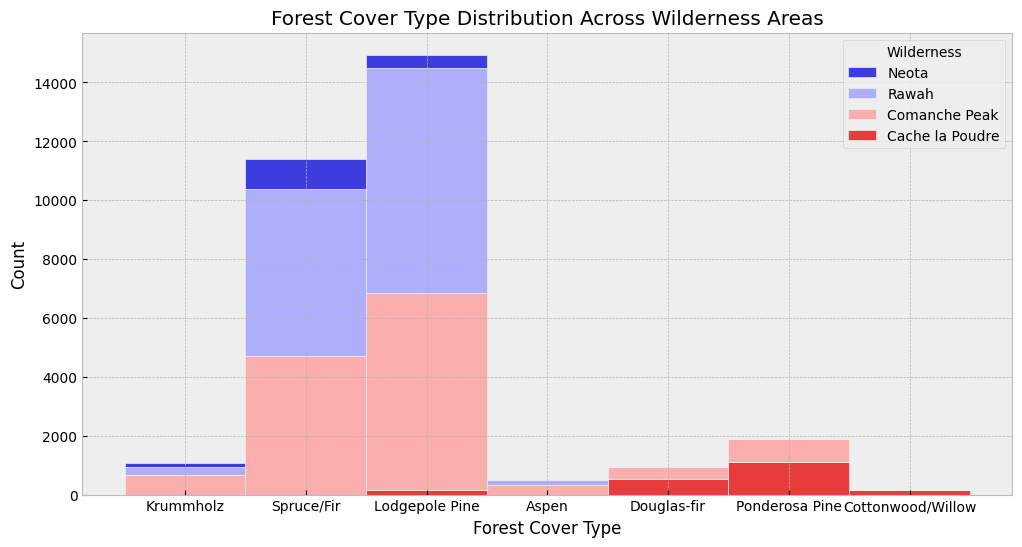

In [22]:
# Plotting the distribution of forest cover types across different wilderness areas using a stacked histogram.

wilderness_columns = ["Neota", "Rawah", "Comanche Peak", "Cache la Poudre"]

# Aggregate counts of forest types per wilderness
forest_wilderness_counts = df[wilderness_columns + ["Forest_Cover"]].melt(id_vars="Forest_Cover", var_name="Wilderness", value_name="Presence")
forest_wilderness_counts = forest_wilderness_counts[forest_wilderness_counts["Presence"] == 1]

plt.figure(figsize=(12, 6))
sns.histplot(data=forest_wilderness_counts, x="Forest_Cover", hue="Wilderness", multiple="stack", palette="seismic", discrete=True)
plt.title("Forest Cover Type Distribution Across Wilderness Areas")
plt.xlabel("Forest Cover Type")
plt.ylabel("Count")
plt.show()

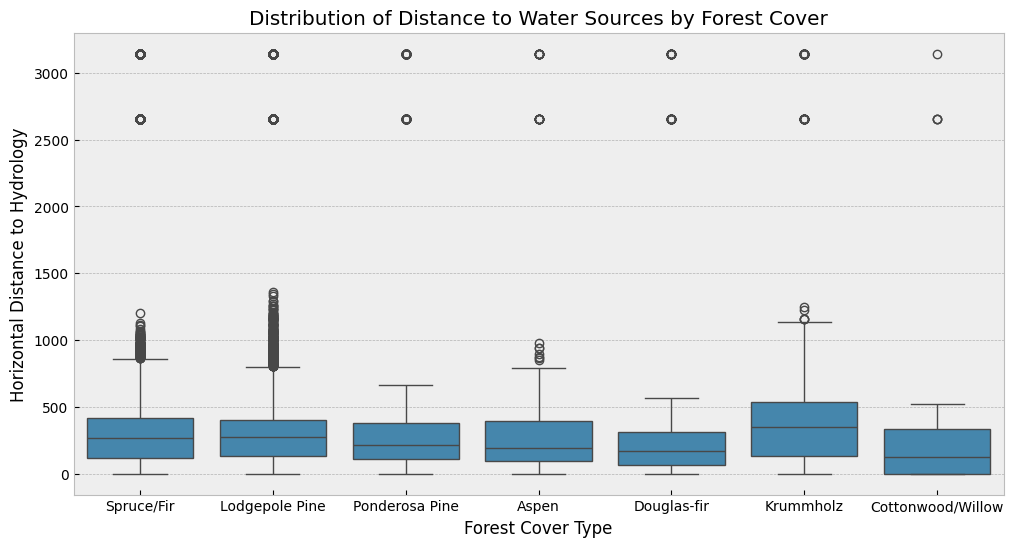

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Forest_Cover", y="Horizontal_Distance_To_Hydrology", data=df)
plt.xlabel("Forest Cover Type")
plt.ylabel("Horizontal Distance to Hydrology")
plt.title("Distribution of Distance to Water Sources by Forest Cover")
plt.show()


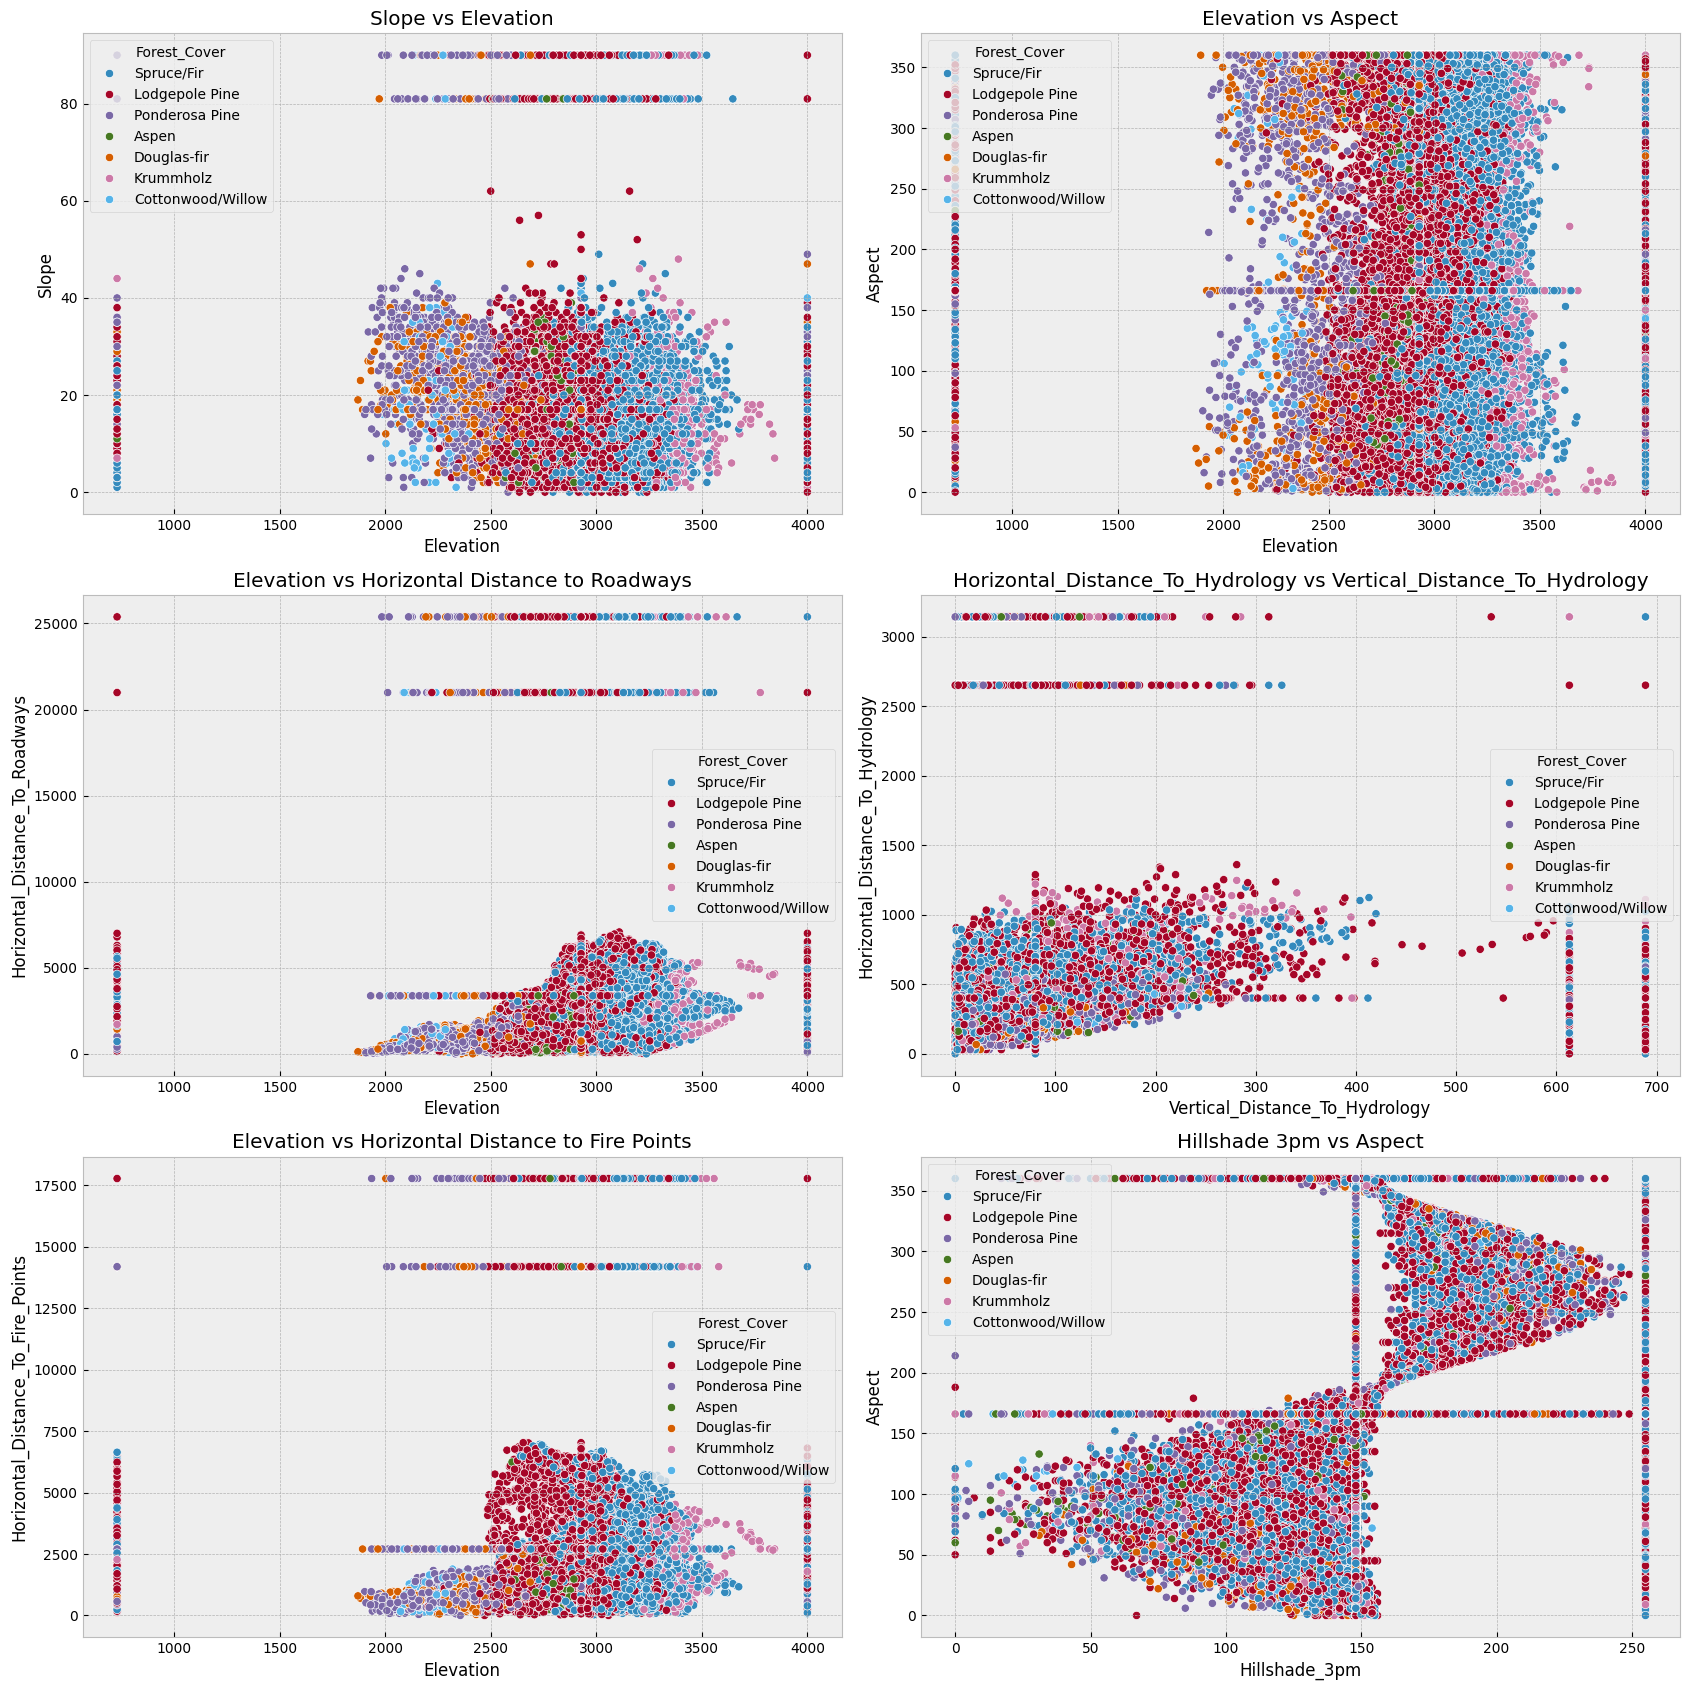

In [24]:
fig, axs = plt.subplots(3, 2,figsize=(17,17))

plt.subplot(321)
sns.scatterplot(data=df, y='Slope', x='Elevation', hue='Forest_Cover')
plt.title("Slope vs Elevation")

plt.subplot(322)
sns.scatterplot(data=df, y='Aspect', x='Elevation', hue='Forest_Cover')   
plt.title("Elevation vs Aspect")

plt.subplot(323)
sns.scatterplot(data=df, y='Horizontal_Distance_To_Roadways', x='Elevation', hue='Forest_Cover')
plt.title("Elevation vs Horizontal Distance to Roadways")

plt.subplot(324)
sns.scatterplot(data=df, y='Horizontal_Distance_To_Hydrology', x='Vertical_Distance_To_Hydrology', hue='Forest_Cover')  
plt.title("Horizontal_Distance_To_Hydrology vs Vertical_Distance_To_Hydrology")

plt.subplot(325)
sns.scatterplot(data=df, y='Horizontal_Distance_To_Fire_Points', x='Elevation', hue='Forest_Cover')
plt.title("Elevation vs Horizontal Distance to Fire Points")

plt.subplot(326)
sns.scatterplot(data=df, y='Aspect', x='Hillshade_3pm', hue='Forest_Cover') 
plt.title("Hillshade 3pm vs Aspect")

plt.tight_layout()
plt.show()

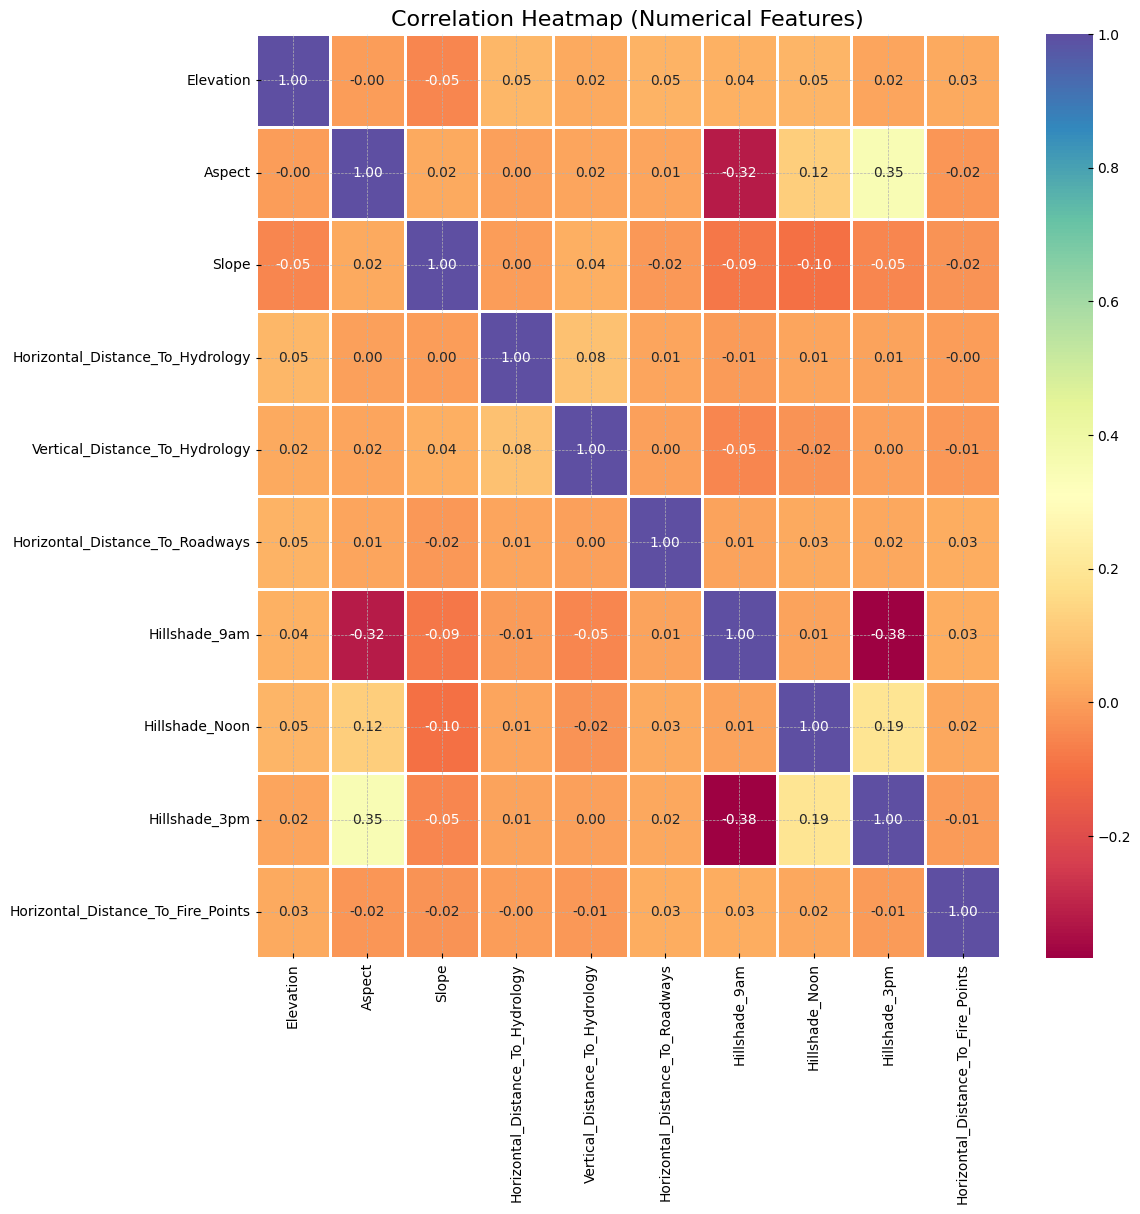

In [25]:
# Select only numerical columns
numerical_feature_columns = df.loc[:, 'Elevation':'Horizontal_Distance_To_Fire_Points']

# Compute correlation matrix
corr_matrix = numerical_feature_columns.corr()

# Set figure size
plt.figure(figsize=(12, 12))

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Spectral", linewidths=1)

# Title
plt.title("Correlation Heatmap (Numerical Features)", fontsize=16)

# Show plot
plt.show()

In [26]:
# Save the cleaned dataset to a new file
df.to_csv('cleaned_dataset', index=False)

# Confirm the file was saved
print("Cleaned dataset saved as 'cleaned_dataset'")

Cleaned dataset saved as 'cleaned_dataset'
